STUFF TO DO 

- Change my_animate_orbits to show new moon

#### Exploration of the effects of varying the masses of the Sun, Earth, and Moon on their orbits
###### Matthew Parker

In [44]:
# Imports used throughout script 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from IPython.display import Image
import os

------------------

#### Code compilation and running 

In this section, the corresponding C++ code is compiled and used to produce the four base csv files for the system under the follwing conditions:
- standard conditions, mass of Sun=1 solar mass, mass of Moon=1 solar mass 
- light sun: mass of Sun = 0.7 solar mass, mass of Moon = 1 solar mass 
- heavy sun: mass of Sun = 1.3 solar mass, mass of Moon = 1 solar mass 
- heavy moon: mass of Sun = 1 solar mass, mass of Moon = 100 solar mass  

Furthermore, the code can be ran with custom inputs for the relative mass of the Sun and the Moon, to explore how these inputs vary. These values are initially set to 0.8 and 73, to show typical outputs for how varying these masses affect the orbits of the Earth and the Moon. 

In the "run_code" function contained within this section, a subprocess is started which runs the corresponding C++ script. This subprocess is currently written to run through WSL, so if the user's machine does not use WSL, this will need to be edited.

In [2]:
def compile_code(compile_filename):
    """
    function to compile a c++ script.

    Args:
        compile_filename (string): name of c++ script to be compiled
    """
    # check filename is a c++ file
    if compile_filename[-4:] != ".cpp":
        raise Exception(f"{compile_filename} must be a C++ file")
    
    compiled_code_name = compile_filename[:-4]
    
    # Only compile file if it has not already been compiled
    if os.path.exists(compiled_code_name):
        print(f"{compile_filename} already compiled")
        return
    
    # If it has not been compiled, attempt to compile it. 
    try:
        print(f"compiling {compile_filename} to {compiled_code_name}")
        subprocess.run(["wsl", "g++", "-fopenmp", f"{compile_filename}", "-o", f"{compiled_code_name}"], check=True)
        print("Code compiled successfully.")
    except:
        raise Exception(f"\n {compile_filename} did not compile.")



In [3]:
def run_code(csv_filename, relative_sun_mass, relative_moon_mass, cpp_file="assessment_6.cpp"):
    """
    run the compiled c++ script. The c++ script produces a csv file.
    NB/ subprocess.run path stars with "wsl" which may need to be changed if on a Mac?

    Args:
        csv_filename (string): name of csv file to be produced
        relative_sun_mass (float): relative mass of the sun in solar masses
        relative_moon_mass (float): relative mass of the moon in lunar masses
        cpp_file (string, optional): name of compiled c++ script. Defaults to "assessment_6.cpp"
        
    """
    # Check file to be compiled is a c++ file
    if cpp_file[-4:] != ".cpp":
        raise Exception("input file is not c++ file")
    else:
        # remove .cpp from filename
        compiled_file = cpp_file[:-4]
        
    if csv_filename[-4:] != ".csv":
        raise Exception("input filename is not a csv")
    
    print(f"Running code for {csv_filename}. ")
    
    # SUbprocess that runs compiled_file. "wsl" may need to be changed if on a Mac?
    result = subprocess.run(["wsl", f"./{compiled_file}", f"{relative_sun_mass}", f"{relative_moon_mass}", f"{csv_filename}"], text=True,  capture_output=True)

    # Print output produced by C++ code
    print("Output of C++ file:\n ", result.stdout)
    if (result.stderr)!="":
        print("ERROR message: ", result.stderr)

In [4]:
def compile_and_run_code(relative_sun_mass, relative_moon_mass, output_filename=None, cpp_filename = "assessment_6.cpp"):
    """
    Function to run and save a c++ script with custom inputs to produce a csv file. 

    Args:
        relative_sun_mass (float): relative mass of the sun in solar masses
        relative_moon_mass (float): relative mass of the moon in lunar masses
        output_filename (string, optional): name of csv file to be produced. Defaults to None - name produced automatically using relative sun and moon masses .
        cpp_filename (str, optional): name of compiled c++ script. Defaults to "assessment_6.cpp".

    Returns:
        output_filename (string): name of csv file produced
    """
    # Check inputs
    if relative_sun_mass < 0.7 or relative_sun_mass > 1.3:
        raise ValueError("relative_sun_mass must be between 0.7 and 1.3")
    elif relative_moon_mass < 1 or relative_moon_mass > 100:
        raise ValueError("relative_moon_mass must be between 1 and 100")
    
    # If custom csv filename is not provided, or is not a csv file, give output_filename the default name
    if output_filename==None or output_filename[-4:]!=".csv":
        output_filename = f"{relative_sun_mass:.2f}_sun__{relative_moon_mass:.1f}_moon.csv"
        
    print(f"Output CSV filename: {output_filename}")
        
    # Compile C++ code (function checks if it has already been compiled, so only done once even if run multiple times)
    compile_code(cpp_filename)
    
    # If CSV doesn't exist, run code. 
    # If CSV already exists, no need to rerun and replace CSV.
    if not os.path.exists(output_filename): 
        print(f"CSV file for {output_filename} does not exist. ")
        run_code(f"{output_filename}", relative_sun_mass , relative_moon_mass, cpp_file=cpp_filename)
    else:
        print(f"{output_filename} already exists. \n")
        
    return output_filename
    

In [70]:
# Produce csv files for standard conditions, sun at maximum relative mass, and sun at minimum relative mass.
sun_masses = [0.7, 1, 1.3]
for i, sun_mass in enumerate(sun_masses):
    compile_and_run_code(sun_mass, 1)
    
#  Produce csv file for moon with lunar mass = 100
compile_and_run_code(1, 100)

Output CSV filename: 0.70_sun__1.0_moon.csv
assessment_6.cpp already compiled
0.70_sun__1.0_moon.csv already exists. 

Output CSV filename: 1.00_sun__1.0_moon.csv
assessment_6.cpp already compiled
1.00_sun__1.0_moon.csv already exists. 

Output CSV filename: 1.30_sun__1.0_moon.csv
assessment_6.cpp already compiled
1.30_sun__1.0_moon.csv already exists. 

Output CSV filename: 1.00_sun__100.0_moon.csv
assessment_6.cpp already compiled
1.00_sun__100.0_moon.csv already exists. 



'1.00_sun__100.0_moon.csv'

In [62]:
# Pick a file of interest
# Name of file that will be plotted against the standard orbits
relative_sun_mass = 0.8
relative_moon_mass = 73
output_filename = compile_and_run_code(relative_sun_mass, relative_moon_mass)

Output CSV filename: 0.80_sun__73.0_moon.csv
assessment_6.cpp already compiled
CSV file for 0.80_sun__73.0_moon.csv does not exist. 
Running code for 0.80_sun__73.0_moon.csv. 
Output of C++ file:
  Relative mass of the earth: 1
Relative mass of the sun: 0.8
Relative mass of the moon: 73
Number of simulated years: 3
writing to csv file: 0.80_sun__73.0_moon.csv



------------------

#### Analysis of orbits

In this section, the csv files produced above are loaded into pandas dataframe. 

In [10]:
def get_dataframe(filename):
    """
    convert csv file into pandas dataframe, with index changed to be in days rather than hours

    Args:
        filename (str): name of filename to be converted to 

    Returns:
        orbit (df): dataframe of data in csv file
    """
    try:
        orbit = pd.read_csv(filename)
    except:
        raise Exception(f"{filename} is not a csv file")
    # Convert index to be in days. 
    # orbit.index = pd.Index((orbit.index / 24).round(2), name="Time / days")
    orbit.index = pd.Index((orbit.index / 24))
    return orbit

In [63]:
# Load in orbits of standard and extreme sun masses
standard_orbit = get_dataframe('1.00_sun__1.0_moon.csv')
light_sun_orbit = get_dataframe("0.70_sun__1.0_moon.csv")
heavy_sun_orbit = get_dataframe("1.30_sun__1.0_moon.csv")
heavy_moon_orbit = get_dataframe("1.00_sun__100.0_moon.csv")

# Load dataframe of orbit of interest
orbit_of_interest = get_dataframe(output_filename)

# Show dataframe
orbit_of_interest

,x1,y1,x2,y2,x3,y3
0.000000,0.000000e+00,0.000000e+00,1.495000e+11,0.000000e+00,1.495000e+11,3.840000e+08
0.041667,2.194550e-01,2.665950e-04,1.495000e+11,1.072240e+08,1.494960e+11,4.911900e+08
0.083333,8.778290e-01,1.381170e-03,1.495000e+11,2.144790e+08,1.494930e+11,5.983460e+08
0.125000,1.975130e+00,3.658550e-03,1.495000e+11,3.217650e+08,1.494890e+11,7.054650e+08
0.166667,3.511370e+00,7.413560e-03,1.495000e+11,4.290830e+08,1.494850e+11,8.125500e+08
...,...,...,...,...,...,...
1094.791667,1.418080e+06,2.145000e+07,-9.522030e+10,-1.918270e+11,-9.503600e+10,-1.915270e+11
1094.833333,1.417530e+06,2.145090e+07,-9.514380e+10,-1.918450e+11,-9.496210e+10,-1.915420e+11
1094.875000,1.416980e+06,2.145180e+07,-9.506730e+10,-1.918630e+11,-9.488810e+10,-1.915570e+11
1094.916667,1.416440e+06,2.145270e+07,-9.499080e+10,-1.918820e+11,-9.481420e+10,-1.915720e+11


-----------------------

####  Compare orbits of Earth as mass of Sun is varied

These dataframes are used to plot each orbit of the Earth around the Sun, showing their orbits in comparison to the Sun's habitable zone. 

In [16]:
def plot_habitable_zone(ax, lower_bound=1.481E11,upper_bound=2.543E11):
    """
    Plot habitable zone of a star. Defaults to Earth's habitable zone

    Args:
        ax (plt.Axes): axis to plot habitable zone on
        lower_bound (float, optional): lower bound of radius of habitable zone. Defaults to 1.481E11.
        upper_bound (float, optional): upper bound of radius of habitable zone . Defaults to 2.543E11.
    """
    # Plot multiple circles, to produce filled in disk between upper and lower bounds
    for i in np.linspace(lower_bound, upper_bound, 50 ):
        circle = plt.Circle((0, 0), i, color='b', fill=False, alpha=0.1)
        ax.add_patch(circle)

In [72]:
def compare_earth_orbits(orbits, labels):
    """
    Function to plot multiple paths of Earth's orbit around the sun under different conditions

    Args:
        orbits (list): list of orbits as pd.dataframe
        labels (list): labels for legend
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot sun at centre of figure
    ax.scatter(0,0, label="Sun", color="red")
    
    
    
    # Loop through each orbit and plot them
    for i, orbit in enumerate(orbits):
        # Check orbits have correct columns
        try:
            x = orbit['x2']
            y = orbit['y2']
        except:
            raise Exception(f"orbit has no column named 'x2' or 'y2'.")
        
        linestyle='-'
        marker=','
        linewidth=2
        
        # Plot orbit of interest slightly differently (possible it may overlap the 3 base orbits. )
        if labels[i] == "orbit of interest":
            linestyle=':'
            linewidth=1
            
        # Plot orbit of Earth around the Sun
        ax.plot(x, y, label=labels[i], linestyle=linestyle, marker=marker, linewidth=linewidth)
        
    plot_habitable_zone(ax)  
    
    ax.set_aspect("equal")
    ax.set_xlabel("x positions / km")
    ax.set_ylabel("y positions / km")
    ax.legend(loc="upper left")

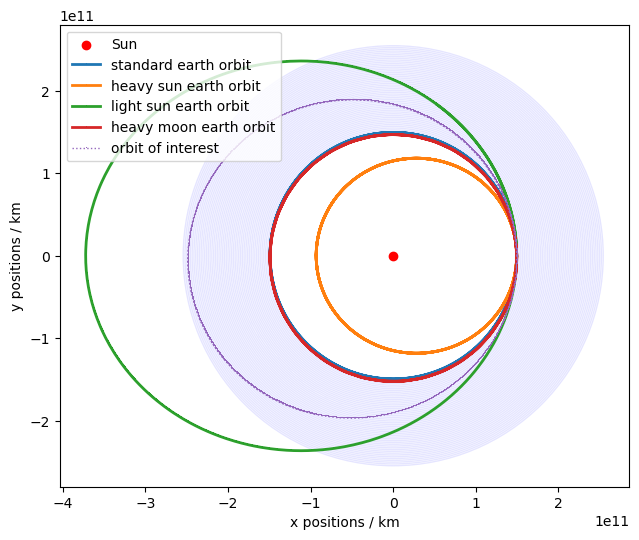

In [73]:
# Comparison of the eccentricity of the orbit of the Earth around the Sun, for varying relative masses of the Sun. 

orbits = [standard_orbit, heavy_sun_orbit, light_sun_orbit, heavy_moon_orbit, orbit_of_interest]
orbits_labels = ["standard earth orbit", "heavy sun earth orbit", "light sun earth orbit", "heavy moon earth orbit", "orbit of interest"]

# Plot all the different orbits on a singular plot
compare_earth_orbits(orbits, orbits_labels)


----------------------

#### Calculate eccentricity of Earth's orbit

The eccentricity of each of the orbits of the Earth around the Sun is calculated. 

In [24]:
def calc_distances(orbit, calc_differences=False, dims = ["x", "y"]):
    """
    calculate sun to earth distance and the difference between the sun/earth and sun/moon distances

    Args:
        orbit (pd.DataFrame): dataframe of positions of each planet
        calc_differences (bool): Indicates whether to calculate difference between sun/earth and sun/moon distances. Defaults to False. 
        dims (list): list of dimensions used in this simulation. Defaults to 2d: x and y.

    Returns:
        sun_to_earth_distances (array): array of the distance between the sun and the earth at each iteration point
        differences_between_se_and_sm_distances (array): array of the difference between the distance between
                        the sun and the earth and the sun and the moon at each iteration point. None if not calculate
    """
    
    print("Calculating distance between Sun and Earth.")
    sun_to_earth_distances = np.zeros(len(orbit))
    
    # Indicate differences being calculated
    if calc_differences:
        print("Also calculating difference between Sun-Moon and Sun-Earth distances. ")
        differences_between_se_and_sm_distances = np.zeros(len(orbit))
    else:
        differences_between_se_and_sm_distances = None
    

    for i in range(0, len(orbit)):
        # Empty list to be filled with differences in positions for each dimension in this iteration
        se_distance_components = []
        for dim in dims:
            se_distance_component = orbit.iloc[i][f'{dim}1'] - orbit.iloc[i][f'{dim}2']
            se_distance_components.append(se_distance_component)
        
        # Calculate Earth/Sun distances and append to distances list
        sun_to_earth_distance = np.linalg.norm(se_distance_components)    
        sun_to_earth_distances[i] = sun_to_earth_distance
            
        if calc_differences:
            # Empty list to be filled with differences in positions for each dimension in this iteration        
            sm_distance_components = []
            # Loop through number of dims
            for dim in dims:
                sm_distance_component = orbit.iloc[i][f'{dim}1'] - orbit.iloc[i][f'{dim}3']
                sm_distance_components.append(sm_distance_component)
            
            # Calculate sun to moon distance
            sun_to_moon_distance = np.linalg.norm(sm_distance_components)    
            # Calculate difference between Sun/Earth and Sun/Moon distances
            difference_between_se_and_sm_distances = sun_to_earth_distance - sun_to_moon_distance
            # Append to list of differences
            differences_between_se_and_sm_distances[i] = difference_between_se_and_sm_distances
        
    print("Calculations finished")
    return sun_to_earth_distances, differences_between_se_and_sm_distances

In [25]:
def calc_eccentricity(r_a, r_p):
    """
    used to calculate the eccentricity of an orbit 

    Args:
        r_a (float): radius of apoapsis (furthest distance between planet and sun )
        r_p (float): radius of periapsis (smallest distance between planet and sun)

    Returns:
        e (float): eccentricity
    """
    numerator = r_a - r_p
    denominator = r_a + r_p
    e = numerator / denominator
    return e

In [47]:
def calc_earth_eccentricity(sun_to_earth_distances):
    """
    function to calculate the eccentricity of the earths orbit around the sun

    Args:
        sun_to_earth_distances (array): array of the distance between the sun and the earth at each iteration point

    Returns:
        eccentricity (float): Eccentricity of inputted orbit
    """
    # calculate min and  max radii of orbit (apoapsis and periapsis)
    r_a = np.max(sun_to_earth_distances)
    print(f"r_a: {r_a:.3e}")
    r_p = np.min(sun_to_earth_distances)
    print(f"r_p: {r_p:.3e}")

    # calculate earths eccentricity
    eccentricity = calc_eccentricity(r_a, r_p)

    print(f"eccentricity: {eccentricity:.3f} \n")
    
    return eccentricity

In [ ]:
# Calculate eccentricity of Earth's orbit for each set of data
# Calculate difference between Sun-Earth and Sun-Moon distances for orbits of interest. 

# Empty lists to be filled
sun_earth_distances = []
moon_differences_list = []

# Whether to calculate difference in Sun-Earth/ Sun-Moon distances for each orbit 
differences_bool = [True, False, False, True, True]

for i, orbit in enumerate(orbits):
    
    sun_earth_distance, difference_between_distances = calc_distances(orbit, calc_differences=differences_bool[i])
    sun_earth_distances.append(sun_earth_distance)
        
    if difference_between_distances is not None:
        moon_differences_list.append(difference_between_distances)
        
    # Calculate eccentricity of Earth's orbit for each orbit
    calc_earth_eccentricity(sun_earth_distance)

Calculating distance between Sun and Earth.
Also calculating difference between Sun-Moon and Sun-Earth distances. 
Calculations finished
r_a: 1.495e+11
r_p: 1.492e+11
eccentricity: 0.001 

Calculating distance between Sun and Earth.
Calculations finished
r_a: 1.495e+11
r_p: 9.328e+10
eccentricity: 0.232 

Calculating distance between Sun and Earth.
Calculations finished
r_a: 3.724e+11
r_p: 1.495e+11
eccentricity: 0.427 

Calculating distance between Sun and Earth.
Also calculating difference between Sun-Moon and Sun-Earth distances. 
Calculations finished
r_a: 1.522e+11
r_p: 1.466e+11
eccentricity: 0.019 

Calculating distance between Sun and Earth.
Also calculating difference between Sun-Moon and Sun-Earth distances. 
Calculations finished
r_a: 2.489e+11
r_p: 1.493e+11
eccentricity: 0.250 



-----------------

#### Calculate time period of the Moon's orbit around the Earth

In this section, the time period of the Moon's orbit around the Earth is plotted for the standard simulation and the custom simulation. The other two base simulations were ignored because they both have the relative mass of the moon set to 1, so do not show much variation relative to the standard simulation.

The orbit of the Moon when the relative mass of the moon is significantly greater than 1 becomes much more eliptical, as the moon becomes more similar in mass to the Earth.



In [30]:
def plot_end_of_years(orbit, ax):
    """
    PLot dashed green vertical lines to represent end of a year within simulation

    Args:
        orbit (pd.Dataframe): Dataframe containing positions of each body during orbit.
        ax (plt.Axes): axis to plot lines on
    """
    year_value=0
    max_iters = 10
    iters=0
    while year_value < orbit.index[-1] and iters < max_iters:
        ax.axvline(x=year_value, color='green', linestyle='--')
        iters += 1
        year_value=iters*365
    ax.set_xlabel("Time / days")
    ax.set_ylabel("Sun-Earth distance - Sun-Moon distance / m")
    

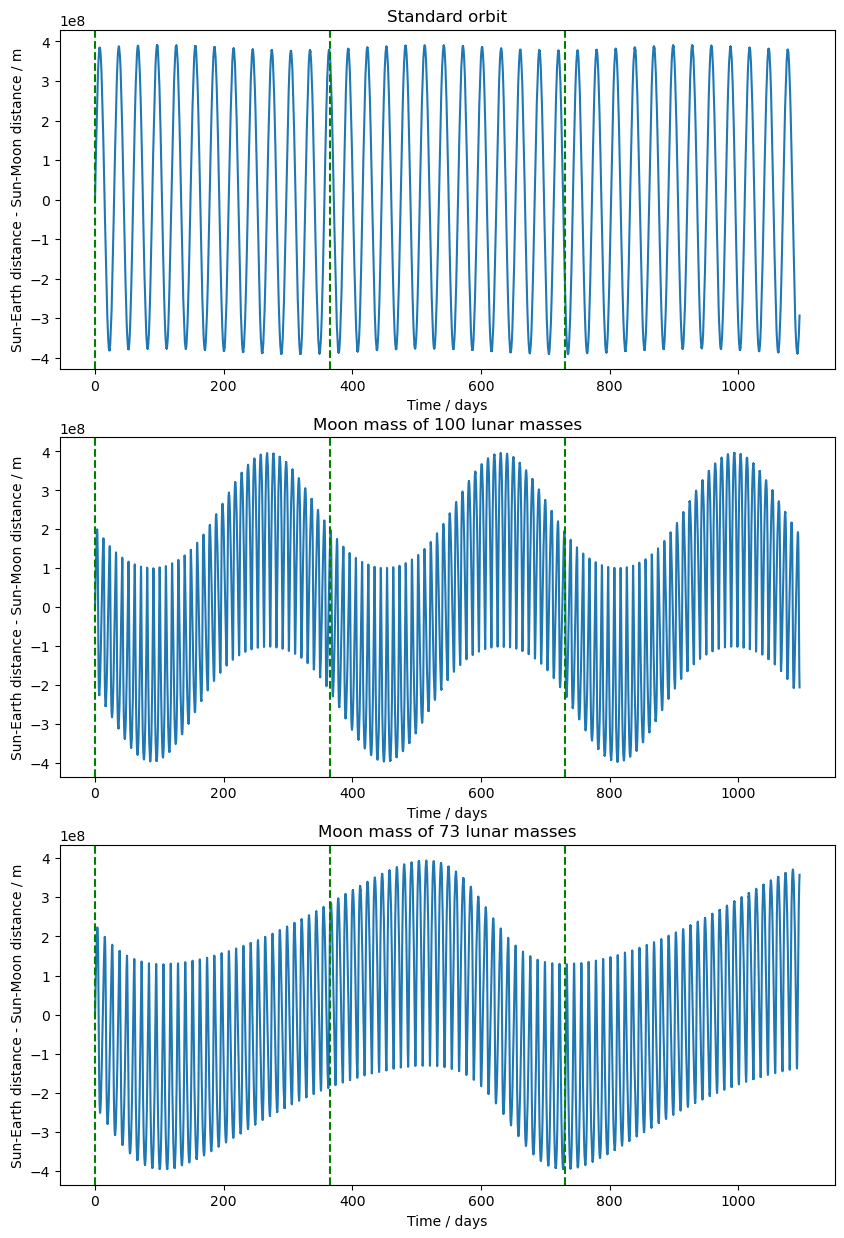

In [66]:
# calculate time period of moons orbit

num_moon_orbits = len(moon_differences_list)
fig, ax = plt.subplots(num_moon_orbits, 1, figsize=(10,5*num_moon_orbits))

moon_orbit_labels = ["Standard orbit", "Moon mass of 100 lunar masses", f"Moon mass of {relative_moon_mass} lunar masses"]

# plot
for i,moon_orbit in enumerate(moon_differences_list):
    ax[i].plot(standard_orbit.index, moon_orbit)
    ax[i].set_title(moon_orbit_labels[i])
    
    # Plot vertical line at end of each simulated year
    plot_end_of_years(standard_orbit, ax[i])

# distance between two peaks
# height= 0 ensures only maximums
# distance = 100 ensures no peaks within 100 hours of each other
standard_peaks = sp.signal.find_peaks(moon_differences_list[0], height=0, distance=100)
# peaks = sp.signal.find_peaks(moon_differences_list[0], height=0, distance=100)

In [33]:
def calc_time_period(peaks):
    """
    Helper function to calculate average time period of the moon orbiting the Earth

    Args:
        peaks (list): list of times when the difference between the Sun-Earth distance and Sun-Moon distance is at a maximum

    Returns:
        float: Average time period of the moon orbiting the Earth
    """
    # Change peaks into days
    day_peaks = np.array(peaks) / 24
    sum = 0
    
    # find average difference between values 
    for i in range(1, len(day_peaks)):
        time_period = day_peaks[i] - day_peaks[i-1]
        sum += time_period

    av_time_period = sum / (i)
    return av_time_period

In [34]:
def calc_moon_time_period(differences, label=""):
    """
    Function to calculate average time period of the moon orbiting the Earth

    Args:
        differences (list): list of the differences between the sun-earth distance and the sun-moon distance for each iteration. 
        label (str, optional): Description of data used. Defaults to "".

    Returns:
        av_time_period (float): Average time period of orbit of moon around the sun 
    """
    peaks = sp.signal.find_peaks(differences, height=0, distance=100)
    
    # Checks peaks are suitable far apart
    # peaks[0] gets array of index, rather than the actual heights of the peaks (which are irrelevant)
    
    av_time_period = calc_time_period(peaks[0])
    
    print(f"Average time period of {label} moon orbit: {av_time_period:.2f} days")
    return av_time_period



In [74]:
# Calculate time period of moon for the standard orbit, and for the orbit of interest

standard_time_period = calc_moon_time_period(moon_differences_list[0], label="standard")
standard_time_period = calc_moon_time_period(moon_differences_list[1], label="l00 lunar mass")
moon_time_period = calc_moon_time_period(moon_differences_list[-1], label=f"{relative_moon_mass} lunar mass")

Average time period of standard moon orbit: 29.70 days
Average time period of l00 lunar mass moon orbit: 9.81 days
Average time period of 73 lunar mass moon orbit: 11.38 days


----------------------------

#### Orbit animations

In this section, gifs are produced showing the orbits of Earth around the Sun and Moon around the Earth. These are produced using either the original animate_orbits.py script or my updated my_animate_orbits.py.

These gifs are then displayed. 


In [39]:
def print_code_output(animated_result):
    """
    Print output produced when the external script is run. IF there is an error, return it. 

    Args:
        animated_result (): result of running external animation script
    """
    print("Output of C++ file:\n ", animated_result.stdout)
    if (animated_result.stderr)!="":
        print("ERROR message: ", animated_result.stderr)


In [68]:
# Produce animation gif of orbit of interest
# This step can take a while

# Set file to be run and converted to gif, this can be changed if required.
output_gif_filename = output_filename

# Set number of frames for gif
frames = 273
print(f"Number of frames: {frames}")

plot_time = len(orbit_of_interest) / (frames*24)
print(f"Number of days run in simulation between each frame of animation: {plot_time:.2f}")

# Change to True to run original animate_orbits.py script
run_original_script=False
if run_original_script:
    original_animated_result = subprocess.run(["python", "./animate_orbits.py", "--filename", f"./{output_gif_filename}", "--frames", f"{frames}"], text=True,  capture_output=True)
    print_code_output(original_animated_result)

# Run my_animate_orbits.py script
# Includes plot of moon's orbit around the Earth - sometimes doesn't plot well if the frame rate is too low. 
gif_filename = f"./{output_gif_filename[:-4]}_{frames}_frames.gif"
print(f"Name of gif to be saved: {gif_filename}")
if not os.path.exists(gif_filename):
    print('Running animation script.')
    my_animated_result = subprocess.run(["python", "./my_animate_orbits.py", "--filename", "./1.00_sun__1.0_moon.csv", "--extra_filename", f"./{output_gif_filename}", "--frames", f"{frames}"], text=True,  capture_output=True)
    print_code_output(my_animated_result)
else:
    print("gif file already saved")


Number of frames: 273
Number of days run in simulation between each frame of animation: 4.01
Name of gif to be saved: ./0.80_sun__73.0_moon_273_frames.gif
Running animation script.
Output of C++ file:
  ./0.80_sun__73.0_moon.csv
Number of frames: 273
Frame: 0
Frame: 0
Frame: 10
Frame: 20
Frame: 30
Frame: 40
Frame: 50
Frame: 60
Frame: 70
Frame: 80
Frame: 90
Frame: 100
Frame: 110
Frame: 120
Frame: 130
Frame: 140
Frame: 150
Frame: 160
Frame: 170
Frame: 180
Frame: 190
Frame: 200
Frame: 210
Frame: 220
Frame: 230
Frame: 240
Frame: 250
Frame: 260
Frame: 270
gif saved as ./0.80_sun__73.0_moon_273_frames.gif

ERROR message:  c:\Users\mpark\Documents\bristol\xfourth year\first term\assessments\assessment_6\assessment-and-data\my_animate_orbits.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  standard_po

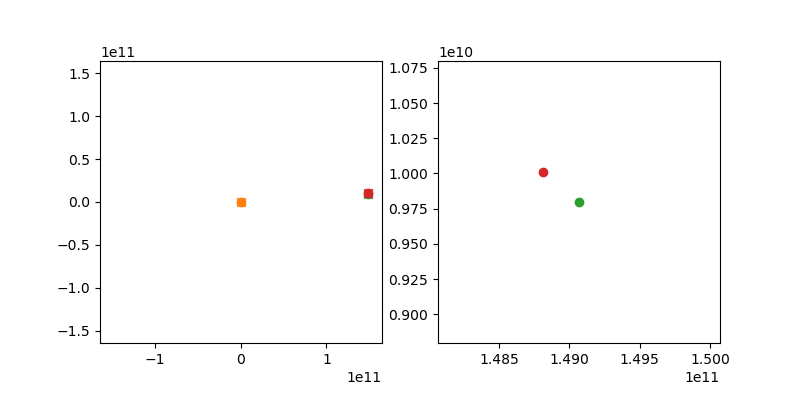

In [41]:
# Show gif from original animate_orbits.py script if it exists
if os.path.exists("orbits.gif"):
    display(Image(filename="orbits.gif"))
else:
    print("orbits.gif does not exist.")
    print("Set run_original_script to True in cell above and rerun to obtain orbits.gif ")

The cell below shows the gif produced in the updated animated_orbits script.

The figure on the right hand side shows the moon's orbit around the Earth. It is plotted as a scatter graph to show the general shape, because it is significantly faster than the orbit of the Earth around the Sun, so there are very few points plotted in a single orbit of the moon around the Earth. 

For this reason, the figure can produce questionable animations if the number of frames is too low. This can cause the moon to look like it is remaining stationary relative to the Earth. This is evidently not the case, and can be fixed by increasing the number of frames in the animation. 

If the frames is set to 100, this means the animation only shows the position of the moon every 263 hours, or 11 days. This only captures 3 points of a moon's full orbit of the Earth under standard conditions, evidently not showing the orbit particularly accurately. This becomes even less accurate as the mass of the moon increases, as the time period of the moon's orbit decreases down to a value of 10 days when the moon's mass is set to 100 lunar masses. This is almost identical to the time between plots in the animation, which means the Moon is roughly in the same place every time it is plotted, producing an inaccurate display of its orbit. 


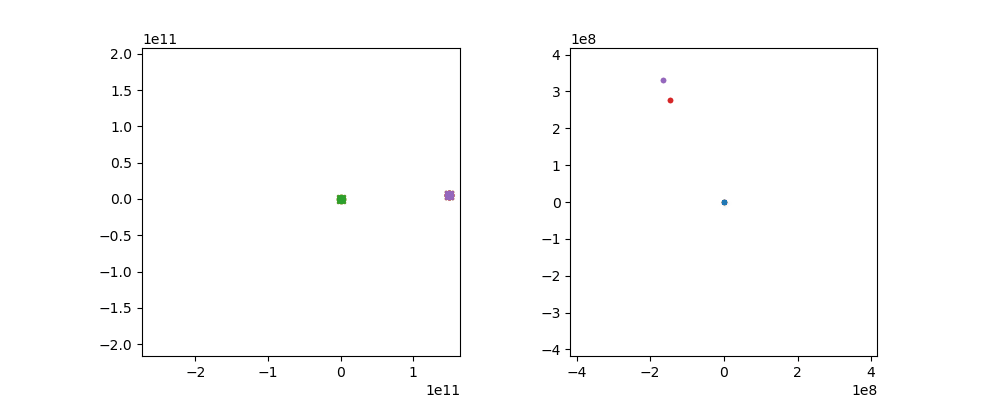

In [69]:
# Show gif from updated my_animate_orbits.py script 
Image(filename=gif_filename)

-----------------------------

#### Calculate how eccentricity of the orbit of the earth varies as relative mass of the Sun varies

Plot of eccentricity against relative mass of the sun. A csv file must be created for each point of the plot, with the eccentricity each time. 

In [ ]:
# Calculate eccentricity of the orbit of the earth around the sun for a range of differnet solar masses

all_eccentricities = []
range_list = list(np.arange(0.7, 1.31, 0.1))
for i in range_list:
    # Get output file
    output_filename = compile_and_run_code(i, 1)
    
    # Convert to dataframe
    orbit = get_dataframe(output_filename)
    
    # Get sun-to-earth distance
    sun_to_earth_distances = calc_distances(orbit)[0]
    
    # Calculate eccentricity and append to list.
    eccentricity = calc_earth_eccentricity(sun_to_earth_distances)
    all_eccentricities.append(eccentricity)


Output CSV filename: 0.70_sun__1.0_moon.csv
vectory_ass_6.cpp already compiled
0.70_sun__1.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Calculations finished
r_a: 3.724e+11
r_p: 1.495e+11
eccentricity: 0.4271 

Output CSV filename: 0.80_sun__1.0_moon.csv
vectory_ass_6.cpp already compiled
0.80_sun__1.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Calculations finished
r_a: 2.485e+11
r_p: 1.495e+11
eccentricity: 0.2488 

Output CSV filename: 0.90_sun__1.0_moon.csv
vectory_ass_6.cpp already compiled
0.90_sun__1.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Calculations finished
r_a: 1.865e+11
r_p: 1.495e+11
eccentricity: 0.1100 

Output CSV filename: 1.00_sun__1.0_moon.csv
vectory_ass_6.cpp already compiled
1.00_sun__1.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Calculations finished
r_a: 1.495e+11
r_p: 1.492e+11
eccentricity: 0.0011 

Output CSV filename: 1.10_sun__1.0_moon.csv


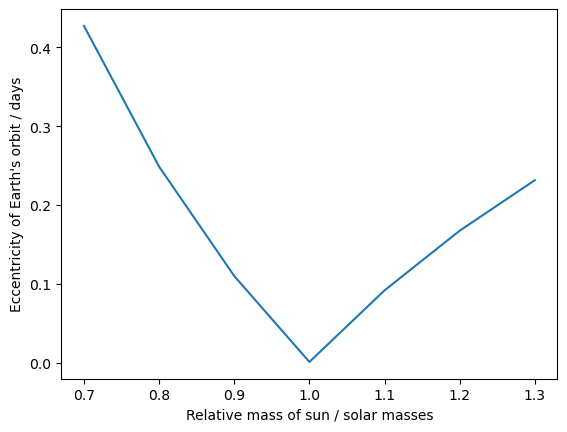

In [36]:
# Plot of the eccentricity of the orbit of the earth around the sun against relative solar mass

fig, ax = plt.subplots()
ax.plot(range_list, all_eccentricities)
ax.set_xlabel("Relative mass of sun / solar masses")
ax.set_ylabel("Eccentricity of Earth's orbit / days");

This figure shows a clear minimum when the relative mass of the sun is set to 1.0 solar masses - i.e. normal conditions. 

---------------------

#### Calculate how time period of moon varies as relative mass of moon varies

This sections explores how the time period of the moon varies as the relative mass of the moon is increased from 1 to 100 lunar masses.

In [49]:
# calculate time period of orbit of moon around the earth for range of moon masses

orbit_times = []
for i in range(1,101, 9):
    # Get output file
    output_filename = compile_and_run_code(1, i)
    
    # Load data to dataframe
    orbit = get_dataframe(output_filename)
    
    # Calculate differences between Sun/Earth and Sun/Moon distances
    differences_between_se_and_sm_distances = calc_distances(orbit, calc_differences=True)[1]
    
    # Calcualte orbital time period and add to list
    orbit_time = calc_moon_time_period(differences_between_se_and_sm_distances)
    orbit_times.append(orbit_time)
    print("-----------------------------------------------------------------------------------------------------------")

Output CSV filename: 1.00_sun__1.0_moon.csv
assessment_6.cpp already compiled
1.00_sun__1.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Also calculating difference between Sun-Moon and Sun-Earth distances. 
Calculations finished
Average time period of  moon orbit: 29.70 days
Output CSV filename: 1.00_sun__10.0_moon.csv
assessment_6.cpp already compiled
1.00_sun__10.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Also calculating difference between Sun-Moon and Sun-Earth distances. 
Calculations finished
Average time period of  moon orbit: 24.07 days
Output CSV filename: 1.00_sun__19.0_moon.csv
assessment_6.cpp already compiled
1.00_sun__19.0_moon.csv already exists. 

Calculating distance between Sun and Earth.
Also calculating difference between Sun-Moon and Sun-Earth distances. 
Calculations finished
Average time period of  moon orbit: 20.42 days
Output CSV filename: 1.00_sun__28.0_moon.csv
assessment_6.cpp already compiled
1.00_sun

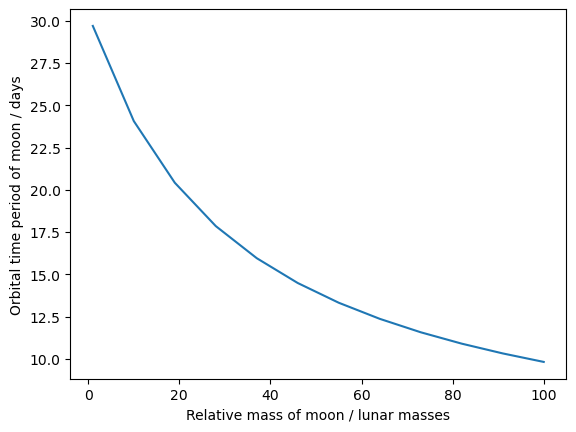

In [50]:
# Plot time period of orbit of moon around the earth against relative mass of the moon 

fig, ax = plt.subplots()
ax.plot(range(1,101, 9), orbit_times)
ax.set_xlabel("Relative mass of moon / lunar masses")
ax.set_ylabel("Orbital time period of moon / days");


-------------------
#### Sun bounce

Plot of the Sun's orbit under standard conditions. This is a clear inaccuracy in the model, as the orbit is un-physical. This is likely due to the initial conditions of the model, as the Sun has no initial velocity which is inaccurate.

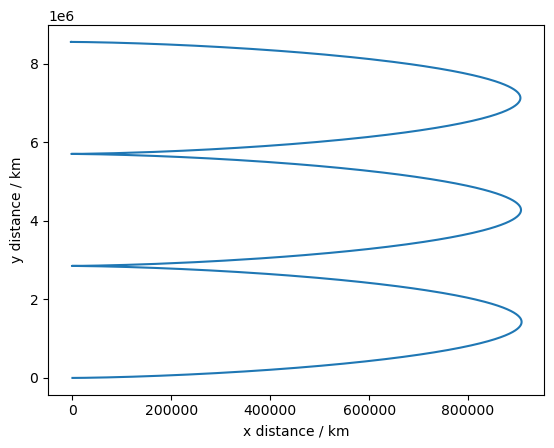

In [40]:
# Movement of the sun over the course of the simulation

fig, ax = plt.subplots()
ax.plot( standard_orbit['x1'], standard_orbit['y1'])
ax.set_xlabel("x distance / km")
ax.set_ylabel("y distance / km");
